In [122]:
import sklearn
from sklearn.datasets import make_circles
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
from torch import nn
from torch import optim

# Binary-Class Classification

In [123]:
n_samples = 1000

X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

In [124]:
circles = pd.DataFrame({"X1":X[:,0],
                        "X2":X[:,1],
                        "label":y})

In [125]:
circles.label.value_counts()

,count
label,
1,500
0,500


In [126]:
X[:5],y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

In [127]:
circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


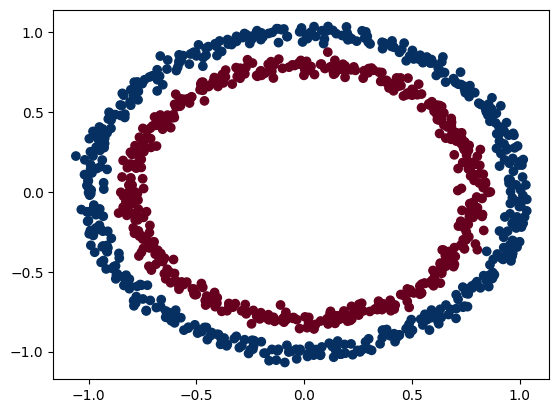

In [128]:
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdBu_r)

In [129]:
X.shape,y.shape

((1000, 2), (1000,))

In [130]:
type(X),type(y),X.dtype

(numpy.ndarray, numpy.ndarray, dtype('float64'))

In [131]:
import torch

torch.__version__

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

type(X),X.dtype

(torch.Tensor, torch.float32)

In [132]:
torch.manual_seed(42)

In [133]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [134]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device )

cpu


In [135]:
X_train[0],y_train[0]

(tensor([ 0.6579, -0.4651]), tensor(1.))

In [136]:
class CircleModel0(nn.Module):
  def __init__(self):
    super().__init__()

    self.Layer = nn.Sequential(
        nn.Linear(in_features = 2, out_features = 10),
        nn.Linear(in_features=10,out_features=1)
    )

  def forward(self,x):
    return self.Layer(x)

In [137]:
class CircleModel(nn.Module):
  def __init__(self):
    super().__init__()

    self.Layer = nn.Sequential(
        nn.Linear(in_features = 2, out_features = 128),
        nn.ReLU(),
        nn.Linear(in_features = 128, out_features = 256),
        nn.ReLU(),
        nn.Linear(in_features=256,out_features=128),
        nn.ReLU(),
        nn.Linear(in_features=128,out_features=1)
    )

  def forward(self,x):
    return self.Layer(x)

In [138]:
circle_model = CircleModel().to(device)
print(circle_model)
circle_model0 = CircleModel0().to(device)
print(circle_model0)

CircleModel(
  (Layer): Sequential(
    (0): Linear(in_features=2, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=1, bias=True)
  )
)
CircleModel0(
  (Layer): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): Linear(in_features=10, out_features=1, bias=True)
  )
)


In [139]:
# circle_model.state_dict()

In [140]:
loss_fn = nn.BCEWithLogitsLoss() #
optimizer = optim.Adam(circle_model.parameters(), lr = 0.01)

In [141]:
def accuracy_fn(y_true,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

In [142]:
torch.manual_seed(42)
epochs = 100
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  # Training
  circle_model.train()
  # Forward Pass

  y_logits = circle_model(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  # Calculate Loss
  loss = loss_fn(y_logits,y_train)
  acc = accuracy_fn(y_true=y_train,y_pred=y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing

  circle_model.eval()

  with torch.inference_mode():

    test_logits = circle_model(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,y_test)
    test_acc = accuracy_fn(y_true=y_test,y_pred=test_pred)
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.2f} | Acc: {acc:.2f} "
              f"| Test Loss: {test_loss.item():.2f} | Test Accuracy: {test_acc:.2f}")


Epoch: 0 | Loss: 0.69 | Acc: 59.38 | Test Loss: 0.72 | Test Accuracy: 50.00
Epoch: 10 | Loss: 0.35 | Acc: 99.00 | Test Loss: 0.32 | Test Accuracy: 94.50
Epoch: 20 | Loss: 0.04 | Acc: 99.50 | Test Loss: 0.03 | Test Accuracy: 100.00
Epoch: 30 | Loss: 0.00 | Acc: 100.00 | Test Loss: 0.02 | Test Accuracy: 99.50
Epoch: 40 | Loss: 0.00 | Acc: 100.00 | Test Loss: 0.00 | Test Accuracy: 100.00
Epoch: 50 | Loss: 0.00 | Acc: 100.00 | Test Loss: 0.00 | Test Accuracy: 100.00
Epoch: 60 | Loss: 0.00 | Acc: 100.00 | Test Loss: 0.00 | Test Accuracy: 100.00
Epoch: 70 | Loss: 0.00 | Acc: 100.00 | Test Loss: 0.00 | Test Accuracy: 100.00
Epoch: 80 | Loss: 0.00 | Acc: 100.00 | Test Loss: 0.00 | Test Accuracy: 100.00
Epoch: 90 | Loss: 0.00 | Acc: 100.00 | Test Loss: 0.00 | Test Accuracy: 100.00


In [143]:
epochs0 = 100

for epoch in range(epochs):
  circle_model0.train()

  y_logits0 = circle_model0(X_train).squeeze()
  y_preds0 = torch.round(torch.sigmoid(y_logits0))
  acc0 = accuracy_fn(y_true=y_train,y_pred=y_preds0)
  loss0 = loss_fn(y_logits0,y_train)


  optimizer.zero_grad()
  loss0.backward()
  optimizer.step()

  # Testing
  circle_model0.eval()
  with torch.inference_mode():

    test_logits0 = circle_model0(X_test).squeeze()
    test_preds0 = torch.round(torch.sigmoid(test_logits0))
    test_loss0 = loss_fn(test_logits0,y_test)
    test_acc0 = accuracy_fn(y_true=y_test,y_pred=test_preds0)
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.2f} | Acc: {acc:.2f} "
              f"| Test Loss: {test_loss.item():.2f} | Test Accuracy: {test_acc:.2f}")

Epoch: 0 | Loss: 0.00 | Acc: 100.00 | Test Loss: 0.00 | Test Accuracy: 100.00
Epoch: 10 | Loss: 0.00 | Acc: 100.00 | Test Loss: 0.00 | Test Accuracy: 100.00
Epoch: 20 | Loss: 0.00 | Acc: 100.00 | Test Loss: 0.00 | Test Accuracy: 100.00
Epoch: 30 | Loss: 0.00 | Acc: 100.00 | Test Loss: 0.00 | Test Accuracy: 100.00
Epoch: 40 | Loss: 0.00 | Acc: 100.00 | Test Loss: 0.00 | Test Accuracy: 100.00
Epoch: 50 | Loss: 0.00 | Acc: 100.00 | Test Loss: 0.00 | Test Accuracy: 100.00
Epoch: 60 | Loss: 0.00 | Acc: 100.00 | Test Loss: 0.00 | Test Accuracy: 100.00
Epoch: 70 | Loss: 0.00 | Acc: 100.00 | Test Loss: 0.00 | Test Accuracy: 100.00
Epoch: 80 | Loss: 0.00 | Acc: 100.00 | Test Loss: 0.00 | Test Accuracy: 100.00
Epoch: 90 | Loss: 0.00 | Acc: 100.00 | Test Loss: 0.00 | Test Accuracy: 100.00


In [144]:
import requests

response = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")

with open("helper_functions.py","w") as f:
  f.write(response.text)

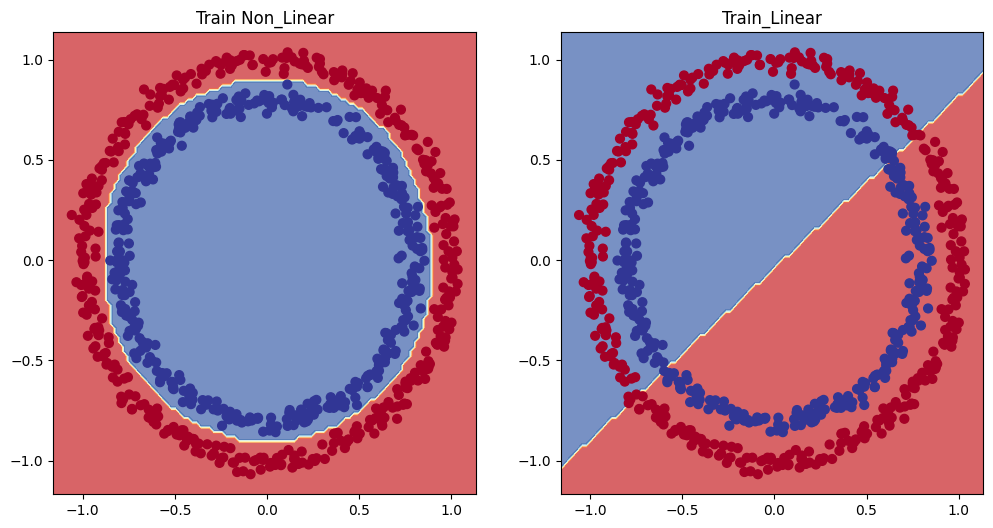

In [145]:
from helper_functions import plot_decision_boundary
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("Train Non_Linear")
plot_decision_boundary(circle_model,X_train,y_train)
plt.subplot(1,2,2)

plt.title("Train_Linear")
plot_decision_boundary(circle_model0,X_train,y_train)


In [146]:
X = torch.arange(-10,10,1)
print(X)

tensor([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,
          4,   5,   6,   7,   8,   9])


In [147]:
relu = nn.ReLU()
A = relu(X)

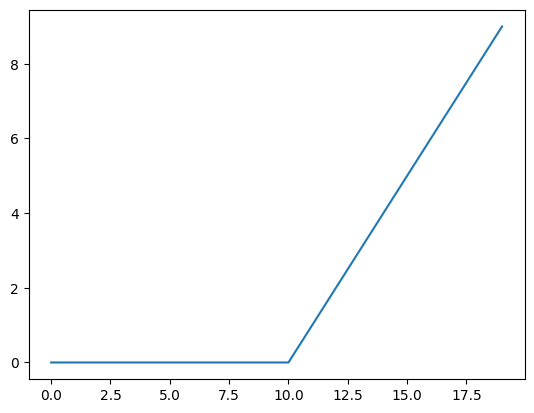

In [148]:
plt.plot(A)

In [149]:
sigmoid = nn.Sigmoid()
B = sigmoid(X)
print(B)

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])


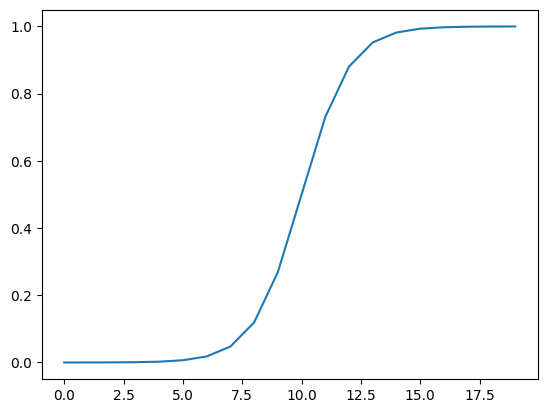

In [150]:
plt.plot(B)

# Multi-Class Classification

In [151]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED
                            )
X_blob = torch.Tensor(X_blob)
y_blob = torch.from_numpy(y_blob)

In [152]:
y_blob[:10],X_blob[:10]

(tensor([3, 2, 2, 1, 1, 2, 1, 2, 2, 1]),
 tensor([[-8.4134,  6.9352],
         [-5.7665, -6.4312],
         [-6.0421, -6.7661],
         [ 3.9508,  0.6984],
         [ 4.2505, -0.2815],
         [-6.7941, -6.4772],
         [ 5.2102,  2.8890],
         [-5.5051, -6.3604],
         [-6.5438, -4.8339],
         [ 6.4496,  0.7478]]))

In [153]:
X_blob_train,X_blob_test,y_blob_train,y_blob_test = train_test_split(X_blob,y_blob,test_size=0.2,random_state=RANDOM_SEED)
X_blob_train,X_blob_test = X_blob_train.to(device),X_blob_test.to(device)
y_blob_train,y_blob_test = y_blob_train.to(device),y_blob_test.to(device)
print(len(X_blob_train))
print(len(y_blob_train))
print(type(X_blob_train))
print(X_blob_test.device)

800
800
<class 'torch.Tensor'>
cpu


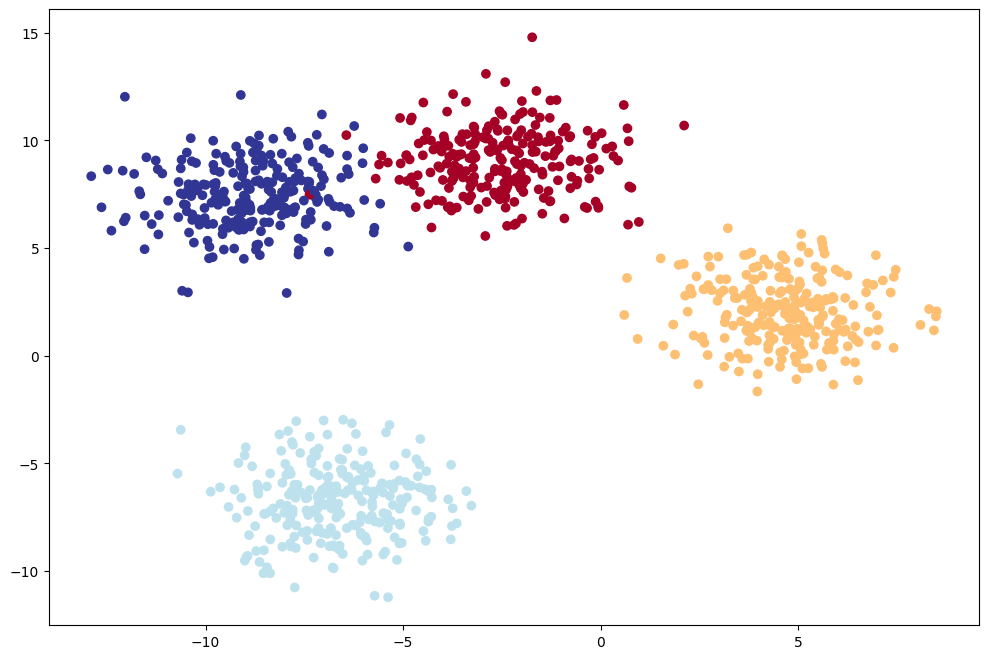

In [154]:
plt.figure(figsize=(12,8))
plt.scatter(X_blob[:,0],X_blob[:,1],c=y_blob,cmap=plt.cm.RdYlBu)

In [155]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cpu


In [156]:
X_blob_train.shape

torch.Size([800, 2])

In [157]:
class MultiClassClassification(nn.Module):
  def __init__(self):
    super().__init__()

    self.classification = nn.Sequential(
        nn.Linear(in_features=2,out_features=64),
        nn.ReLU(),
        nn.Linear(in_features=64,out_features=128),
        nn.ReLU(),
        nn.Linear(in_features=128,out_features=64),
        nn.ReLU(),
        nn.Linear(in_features=64,out_features=4)
    )
  def forward(self,x):
    return self.classification(x)

In [158]:
model = MultiClassClassification().to(device)
print(model)

MultiClassClassification(
  (classification): Sequential(
    (0): Linear(in_features=2, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=4, bias=True)
  )
)


In [159]:
loss_fn = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(),lr=0.01)

In [166]:
torch.manual_seed(42)

epochs = 100

for epoch in range(epochs):
  # 1. Forward Pass
  model.train()

  y_logits = model(X_blob_train)
  y_blob_preds = torch.softmax(y_logits,dim=1).argmax(dim=1)
  # 2. Calculate the loss
  loss = loss_fn(y_logits,y_blob_train)
  acc = accuracy_fn(y_pred=y_blob_preds,y_true=y_blob_train)
  # 3. Optimizer Zero code
  optimizer.zero_grad()
  # 4. Backward pass
  loss.backward()
  # 5. Optimizer Step to change the gadients
  optimizer.step()

  # Testing
  model.eval()
  with torch.inference_mode():
    test_logits = model(X_blob_test)
    test_blob_preds = torch.softmax(test_logits,dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits,y_blob_test)
    test_acc = accuracy_fn(test_blob_preds,y_blob_test)
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.2f} | Acc: {acc:.2f} "
              f"| Test Loss: {test_loss.item():.2f} | Test Accuracy: {test_acc:.2f}")

Epoch: 0 | Loss: 0.03 | Acc: 99.12 | Test Loss: 0.02 | Test Accuracy: 99.50
Epoch: 10 | Loss: 0.03 | Acc: 99.12 | Test Loss: 0.02 | Test Accuracy: 99.50
Epoch: 20 | Loss: 0.03 | Acc: 99.12 | Test Loss: 0.02 | Test Accuracy: 99.50
Epoch: 30 | Loss: 0.03 | Acc: 99.12 | Test Loss: 0.02 | Test Accuracy: 99.50
Epoch: 40 | Loss: 0.03 | Acc: 99.12 | Test Loss: 0.02 | Test Accuracy: 99.50
Epoch: 50 | Loss: 0.03 | Acc: 99.12 | Test Loss: 0.02 | Test Accuracy: 99.50
Epoch: 60 | Loss: 0.03 | Acc: 99.12 | Test Loss: 0.02 | Test Accuracy: 99.50
Epoch: 70 | Loss: 0.03 | Acc: 99.12 | Test Loss: 0.02 | Test Accuracy: 99.50
Epoch: 80 | Loss: 0.03 | Acc: 99.12 | Test Loss: 0.02 | Test Accuracy: 99.50
Epoch: 90 | Loss: 0.03 | Acc: 99.12 | Test Loss: 0.02 | Test Accuracy: 99.50


In [173]:
model.eval()
with torch.inference_mode():
  y_logits = model(X_blob_test)

y_pred_prob = torch.softmax(y_logits,dim=1)
print(y_pred_prob[:10].argmax(dim=1))
print(y_blob_test[:10])

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])
tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])


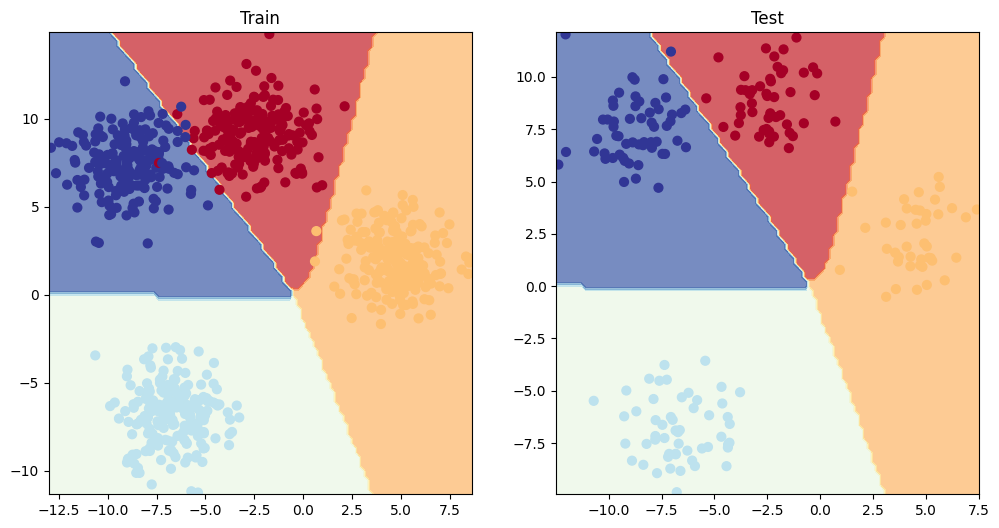

In [175]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model,X_blob_train,y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model,X_blob_test,y_blob_test)